In [1]:
import tensorflow as tf
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Model,layers

In [15]:
training_set = "D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/TrainingSet"
validation_set = "D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/ValidationSet"
test_set = "D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/TestSet"

In [37]:
def loadData(directory):
    categories = ["Chili", "Bean"]
    data = []
    for category in categories:
        # path = directory + "/" + category
        path = os.path.join(directory, category)
        label = categories.index(category)
        print(path)

        # os.listdir("D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/TrainingSet/Chili")
        for img in os.listdir(path):
            image_path = os.path.join(path, img)
            image = cv2.imread(image_path)
            data.append([image, label])
    x = []
    y = []
    for features, label in data:
        x.append(features)
        y.append(label)
    x = np.array(x)
    y = np.array(y)
    return x, y

Load Data set

In [39]:
x_train, y_train = loadData(training_set)
x_val, y_val = loadData(validation_set)
x_test, y_test = loadData(test_set)

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0


D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/TrainingSet\Chili
D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/TrainingSet\Bean
D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/ValidationSet\Chili
D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/ValidationSet\Bean
D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/TestSet\Chili
D:/Pranto/study/4_2/AI/Lab/Assets/DataSet_32x32x3/TestSet\Bean


In [41]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (800, 32, 32, 3) (800,)
Validation set: (116, 32, 32, 3) (116,)
Test set: (230, 32, 32, 3) (230,)


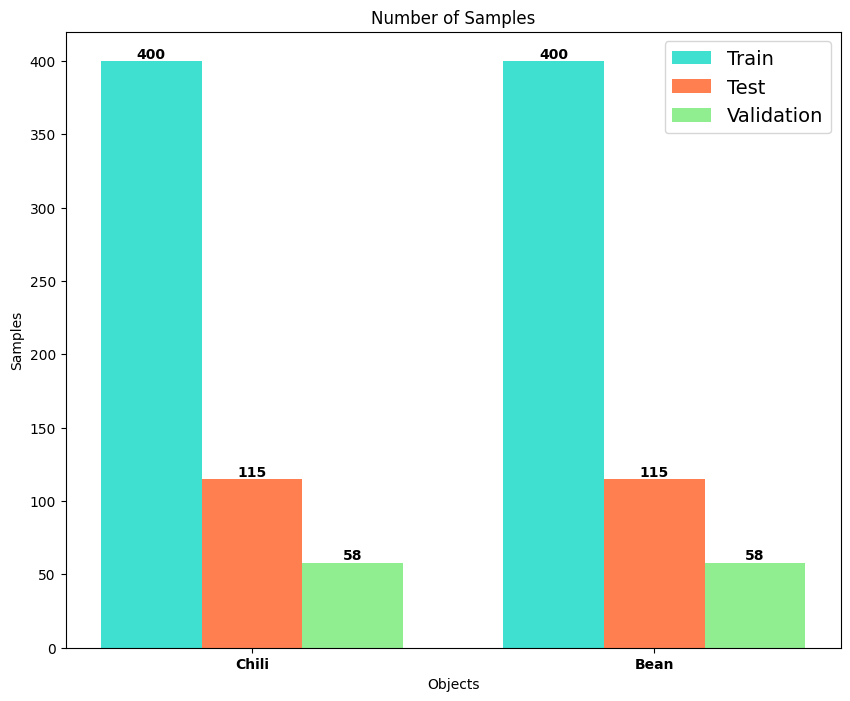

In [44]:
labels = np.concatenate((y_train, y_test, y_val))
values, counts = np.unique(labels, return_counts=True)

train_values, train_counts = np.unique(y_train, return_counts=True)
test_values, test_counts = np.unique(y_test, return_counts=True)
val_values, val_counts = np.unique(y_val, return_counts=True)

bar_width = 0.25
train_x = np.arange(len(train_values)) - bar_width
test_x = np.arange(len(test_values))
valid_x = np.arange(len(val_values)) + bar_width

plt.figure(figsize=(10, 8))
plt.bar(train_x, train_counts, width=bar_width, label='Train', color='turquoise')
for i, count in enumerate(train_counts):
    plt.text(train_x[i], count, str(count), ha='center', va='bottom',  weight = 'bold')

plt.bar(test_x, test_counts, width=bar_width, label='Test', color='Coral')
for i, count in enumerate(test_counts):
    plt.text(test_x[i], count, str(count), ha='center', va='bottom', weight = 'bold')

plt.bar(valid_x, val_counts, width=bar_width, label='Validation', color='lightgreen')
for i, count in enumerate(val_counts):
    plt.text(valid_x[i], count, str(count), ha='center', va='bottom', weight = 'bold')

plt.xlabel('Objects')
plt.ylabel('Samples')
plt.title('Number of Samples')

plt.xticks(test_x, ['Chili', 'Bean'], weight='bold')
plt.legend(fontsize=14)

# Save the plot
# plt.savefig('./spillited_samples2.png')

# Show the plot
plt.show()

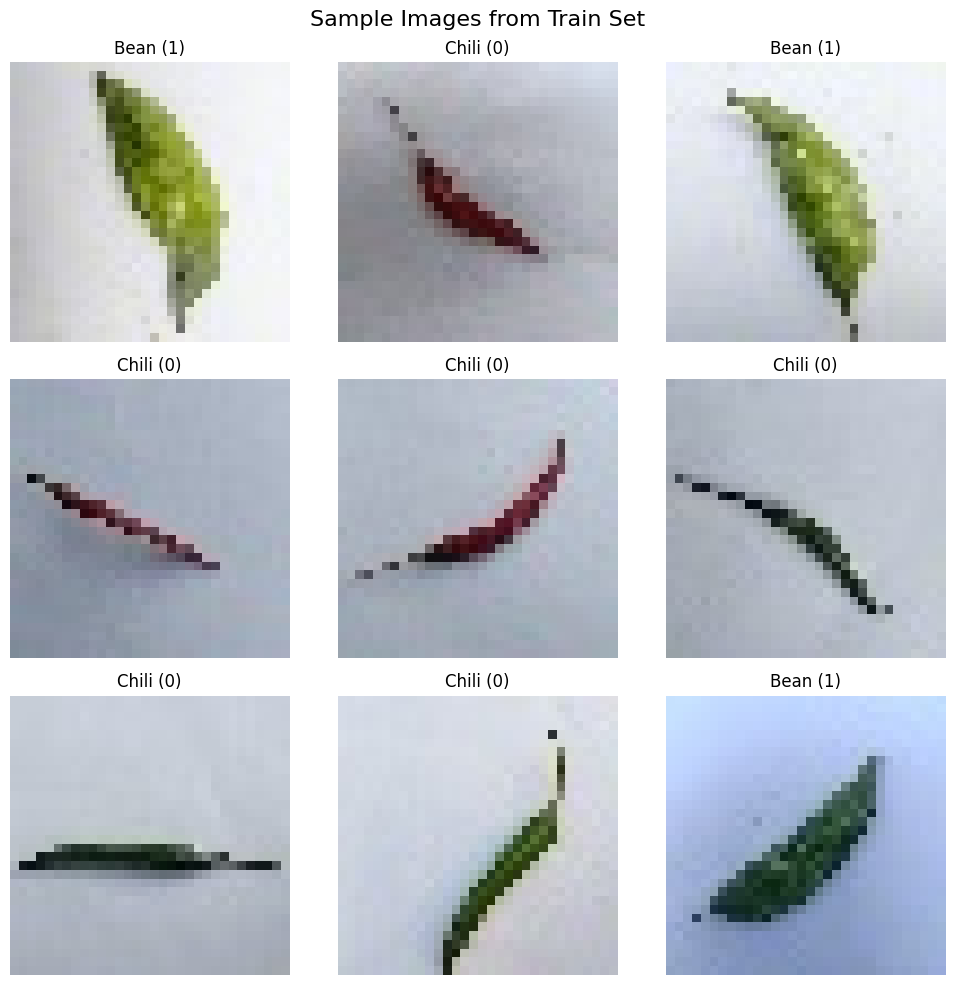

In [45]:
num_images = 9

# Get indices for random images from the train set
random_indices = np.random.choice(len(x_train), size=num_images, replace=False)

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor((x_train[idx] * 255).astype('uint8'),cv2.COLOR_BGR2RGB))
    if y_train[idx] == 0:
        label_text = 'Chili (0)'
    else:
        label_text = 'Bean (1)'
    plt.title(label_text, fontsize=12)
    plt.axis('off')

plt.suptitle('Sample Images from Train Set', fontsize=16)
plt.tight_layout()
plt.show()

Building FCNN

In [46]:
input_shape = (32, 32, 3)
inputs = Input(shape=input_shape)
x = Flatten()(inputs)

x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)


outputs = Dense(1, activation='sigmoid')(x)
model_FCNN = Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_FCNN.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_FCNN.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 32)                98336     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 102561 (400.63 KB)
Trainable params: 102561 (4

In [48]:
inputs = Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_cnn = Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_cnn.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          1846

Choose CNN OR FULLY CONNECTED NN

In [49]:
model = model_cnn

Train the model

In [51]:
# Fit the model
history = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))

Epoch 1/60


25/25 [==============================] - 1s 15ms/step - loss: 0.6618 - accuracy: 0.6525 - val_loss: 0.5947 - val_accuracy: 0.7845
Epoch 2/60
25/25 [==============================] - 0s 8ms/step - loss: 0.3179 - accuracy: 0.9463 - val_loss: 0.1953 - val_accuracy: 0.9138
Epoch 3/60
25/25 [==============================] - 0s 7ms/step - loss: 0.0858 - accuracy: 0.9812 - val_loss: 0.2142 - val_accuracy: 0.8966
Epoch 4/60
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9975 - val_loss: 0.0464 - val_accuracy: 0.9828
Epoch 5/60
25/25 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0441 - val_accuracy: 0.9914
Epoch 6/60
25/25 [==============================] - 0s 8ms/step - loss: 0.0246 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9828
Epoch 7/60
25/25 [==============================] - 0s 7ms/step - loss: 0.0276 - accuracy: 0.9900 - val_loss: 0.2311 - val_accuracy: 0.9224
Epoch 8/60
25/25 

Plot the Validation and training accuracy and loss

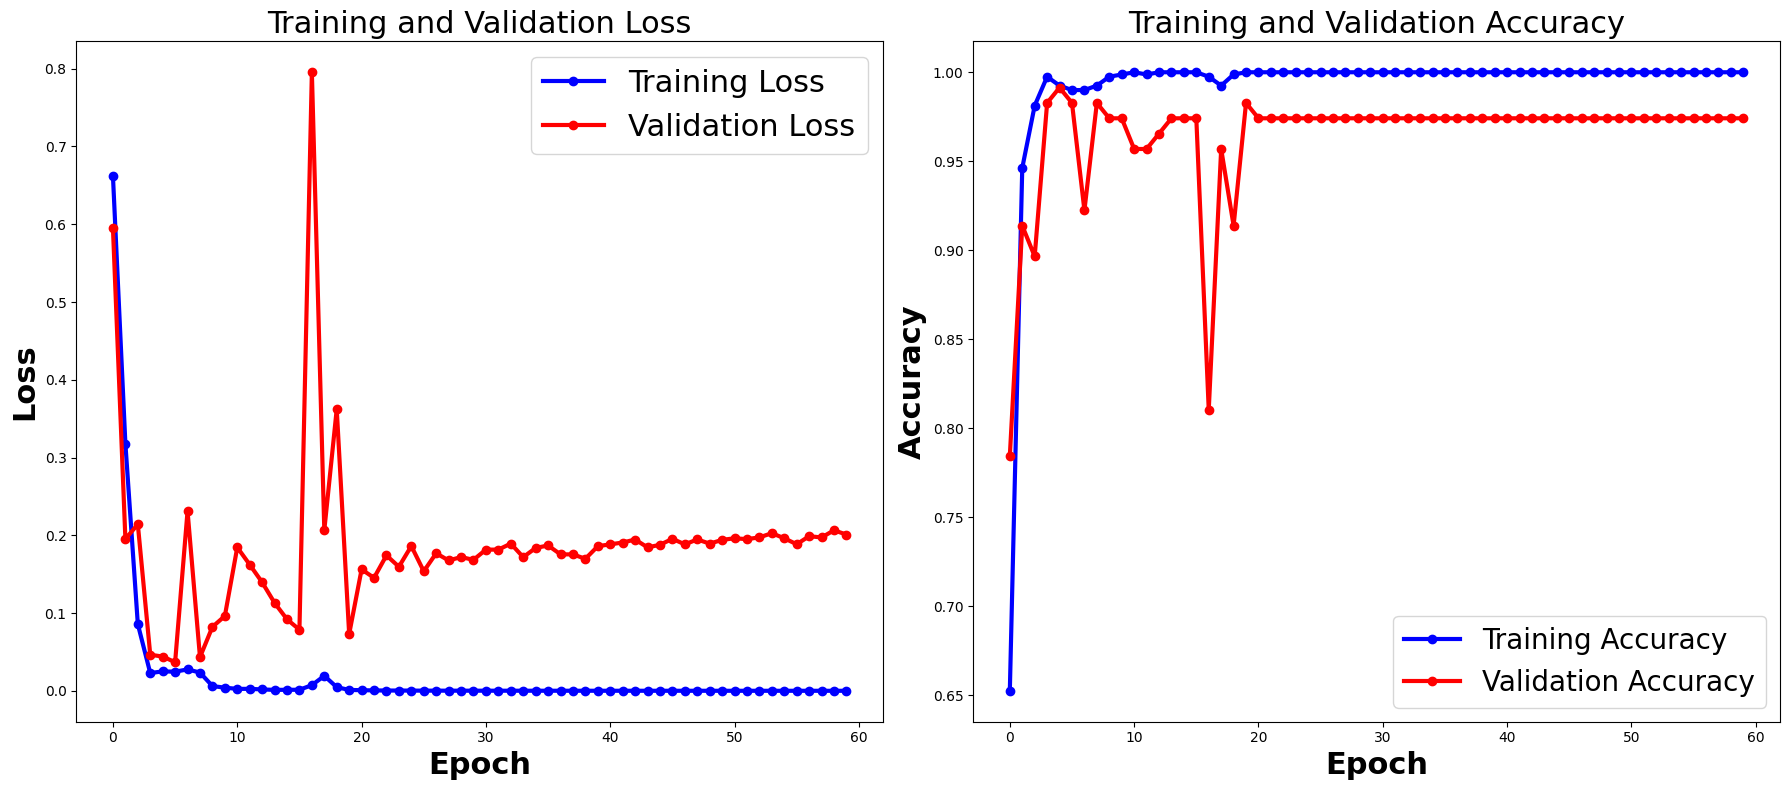

In [53]:

plt.figure(figsize=(18, 8))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '-o', label='Training Loss', color='blue', linewidth=3)
plt.plot(history.history['val_loss'], '-o', label='Validation Loss', color='red', linewidth=3)
plt.xlabel('Epoch',fontsize=22, weight='bold')
plt.ylabel('Loss',fontsize=22, weight='bold')
plt.title('Training and Validation Loss',fontsize=22)
plt.legend(fontsize=22)

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy', color='blue', linewidth=3)
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red', linewidth=3)
plt.xlabel('Epoch',fontsize=22, weight='bold')
plt.ylabel('Accuracy',fontsize=22, weight='bold')
plt.title('Training and Validation Accuracy',fontsize=22)
plt.legend(fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/CNN_Training_and_Validation_Accuracy_and_Loss2.png')
# Show the plot
plt.show()


Evaluate with test set

In [54]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 [==============================] - 0s 6ms/step - loss: 0.4556 - accuracy: 0.9217
Test Loss: 0.455614298582077
Test Accuracy: 0.9217391014099121
